# Julia Basics

Modified from juliabox's tutorial.

Julia is a dynamic language.  You don't need type declarations, and can change variable types dynamically and interactively.

For working with simple numbers, arrays, and strings, its syntax is *superficially* similar to Matlab, Python, and other popular languages.

In order to execute the "In" cells, select the cell and press Shift-Enter, or press the Play button above. To run the entire notebook, navigate to Cell and then click Run All.

The **IJulia notebook** (now called **Jupyter**) can mix code, multimedia results, headings, documentation, equations like $\sqrt{\int x^2 dx}$, and even interactive widgets.

Julia documentation https://docs.julialang.org/en/stable/ is a very useful reference.

I suggest everyone to use the latest version of Julia (current is **v0.7.0**)

Enter the command mode by Esc. Use `Esc+h` for help.   One useful command is `Esc+l`, which toggles the **line number**.

**Last revision**: 8/13/2018 (v0.7.0 compatible)


In [2]:
A = rand(10,300)

10×300 Array{Float64,2}:
 0.0860307  0.875589  0.864838   0.383922   …  0.276678   0.295838  0.601692 
 0.657843   0.708595  0.851383   0.529449      0.760766   0.41443   0.66173  
 0.600183   0.95405   0.795184   0.381633      0.468479   0.678389  0.0931064
 0.149751   0.563823  0.743707   0.202512      0.781668   0.226496  0.87481  
 0.399712   0.247568  0.81027    0.858694      0.455041   0.838165  0.435964 
 0.228434   0.232844  0.0677539  0.0907239  …  0.0358095  0.429403  0.680637 
 0.18073    0.421594  0.106102   0.846068      0.451514   0.511539  0.663147 
 0.47954    0.563279  0.566092   0.077134      0.715283   0.900189  0.696409 
 0.347349   0.154278  0.489726   0.652771      0.418029   0.849783  0.795249 
 0.602079   0.536331  0.876277   0.225863      0.419973   0.696366  0.997095 

It has all of the usual built-in Matlab/Numpy-like linear-algebra and vector functions:

In [20]:
# Basic linear algebra routines are in the LinearAlgebra package (no need to install) starting from v0.7
using LinearAlgebra


b = rand(10) # a random rank-10 vector
x = A \ b    # solve for x satisfying A*x = b; has rank 300
B = A' * A   # A-transpose multiplied by A; is a 300x300 symmetrix matrix with real eigenvalues
eB = eigvals(B)

300-element Array{Float64,1}:
  -4.180982391336315e-13 
  -4.0913773356862766e-13
  -3.306565928890457e-13 
  -2.949868556712918e-13 
  -2.5110356274882283e-13
  -2.0177638649916107e-13
  -1.8928188745886771e-13
  -1.2545081078182745e-13
  -6.663264682927891e-14 
  -5.288356143216286e-14 
  -4.6911283339283006e-14
  -2.982127095392426e-14 
  -2.7634480443379265e-14
   ⋮                     
   3.7447878545559423e-13
   4.191446696897194e-13 
  17.553328703492895     
  19.26118407089331      
  21.936041006951033     
  23.57554248760214      
  24.644093544954167     
  26.012146756270756     
  27.436635708537892     
  27.95514299022057      
  35.91513683249679      
 806.7081079848887       

It also supports convenient vectorisation of functions using the `.` operator:

In [22]:
# Special functions like erf are in the SpecialFunctions package (need to be installed) starting from v0.7
using SpecialFunctions


# @. is a macro that vectorizes the line
# equivalent to adding vectorization to each operation
# eB .- 2x.^2 .+ 4x .- 6

@. eB - 2x^2 + 4x - 6

300-element Array{Float64,1}:
  -6.041338395434566 
  -6.033472454575598 
  -6.032734991665353 
  -5.970768139137883 
  -6.063775497177975 
  -5.9610575238443175
  -5.916046737149462 
  -6.073241534668676 
  -6.020051913234926 
  -5.996827127304426 
  -6.069897495329877 
  -5.982302825891341 
  -5.910993298126653 
   ⋮                 
  -6.008848160320531 
  -5.994560676373236 
  11.596776431298572 
  13.256761900193592 
  15.960835326815381 
  17.653856431597003 
  18.756804251216895 
  20.003129736570166 
  21.44833171947506  
  21.982469348165694 
  29.92130210985679  
 800.806336502986    

Complex numbers and arbitrary-precision arithmetic (via MPFR) are available, of course.

In [23]:
cos(big(3 + 4im))

-2.703494560307422464769480266827091348467753695567661661019265514673434246483996e+01 - 3.851153334811777536563337123053124569704160846091637003157728595256494186490506im

## Unicode

All strings are UTF-8 encoded Unicode by default (UTF-16 and UTF-32 also supported):

In [25]:
# regex search of a Unicode string
# This replaces the old matchall function
collect((m.match for m = eachmatch(r"\s[a-z]+", "α is a Grëék letter"))) 

3-element Array{SubString{String},1}:
 " is"    
 " a"     
 " letter"

Like Python 3, variable names can be Unicode, but Julia allows a somewhat wider range of codepoints in identifiers, which can be typed by LaTeX-like tab-completion *\hat[TAB]\alpha[TAB]*.

In [28]:
α̂= 7
ħ = 6.62606957e-34 / 2π
ẋ = ħ *α̂

7.3820020773540256e-34

Unlike Python 3, Unicode math operators are parsed as infix operators, which are available for user-defined meanings:

In [29]:
≪(x,y) = x < 0.1*y
50 ≪ 100, 5 ≪ 100, 5 ≤ 50

(false, true, true)

In [31]:
const ⊗ = kron

# Note that eye(N,N) is deprecated for representing the identity matrix

Matrix(I,2,2) ⊗ rand(2,2)

4×4 Array{Float64,2}:
 0.0548574  0.596782  0.0        0.0     
 0.477434   0.806901  0.0        0.0     
 0.0        0.0       0.0548574  0.596782
 0.0        0.0       0.477434   0.806901

## Functions and JIT-compilation

Functions can be defined in several ways, and *don't require type-declarations*.

In [58]:
# verbose form:
function foo(x)
    return x + 1
end

# one-line form:
foobar(x) = x + 2

# anonymous function
x -> x + 3

#9 (generic function with 1 method)

In [34]:
foo(3) # compiles foo for Int arguments

4

In [35]:
foo(7) # re-uses compiled foo(Int)

8

In [36]:
foo(7.3) # compiles a different version for Float64 arguments

8.3

In [40]:
# Use vectorization

@. foo([1,2,7,9]) 

4-element Array{Int64,1}:
  2
  3
  8
 10

# Plotting in Julia

We will use the PyPlot package to plot with Julia. This notebook has a few examples to get you started. The [PyPlot.jl](https://github.com/stevengj/PyPlot.jl) site has excellent documentation for plotting.

Loading the PyPlot module may take a few seconds.

In general, all of the arguments, including keyword arguments, are exactly the same as in Python. (With minor translations, of course, e.g. Julia uses `true` and `nothing` instead of Python's `True` and `None`.)

The full matplotlib.pyplot API is far too extensive to describe here; see the [matplotlib.pyplot documentation](http://matplotlib.org/api/pyplot_api.html) for more information. The Matplotlib version number is returned by PyPlot.version.

You need to use **Pkg.add("PyPlot")** the first time to install the package.

Another commonly used one is Gadfly http://gadflyjl.org/stable/

In [41]:
# PyPlot package needs to be installed

using PyPlot

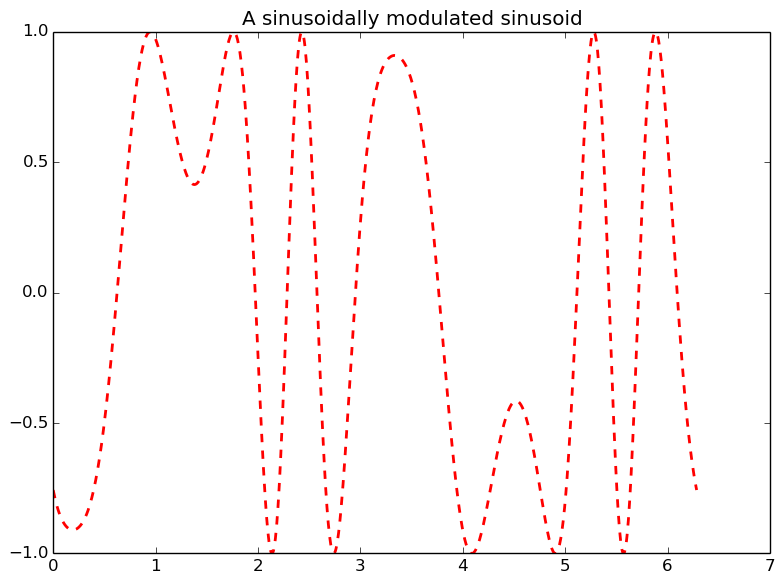

PyObject <matplotlib.text.Text object at 0x7f0d5945aed0>

In [46]:
# range plays the role of linspace starting from v0.7.0

x = range(0,stop=2*pi,length=1000)
@. y = sin(3*x + 4*cos(2*x))

plot(x, y, color="red", linewidth=2.0, linestyle="--")
title("A sinusoidally modulated sinusoid")

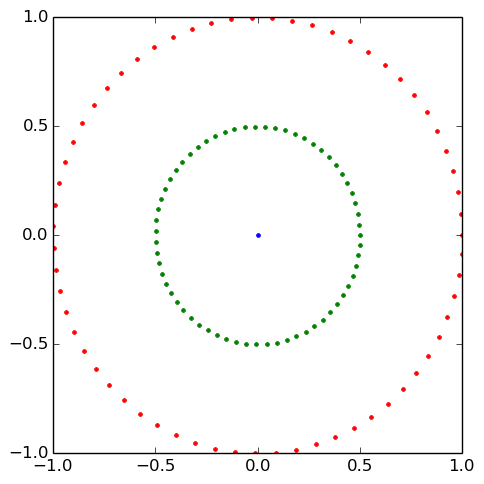

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0d59253bd0>

In [47]:
# Draw (x, y) points
figure(figsize=(5, 5))
θ = collect(0:0.1:2π)
plot(0,0,"b.")
plot(cos.(θ), sin.(θ), "r.")
plot(0.5cos.(θ), 0.5sin.(θ), "g.")

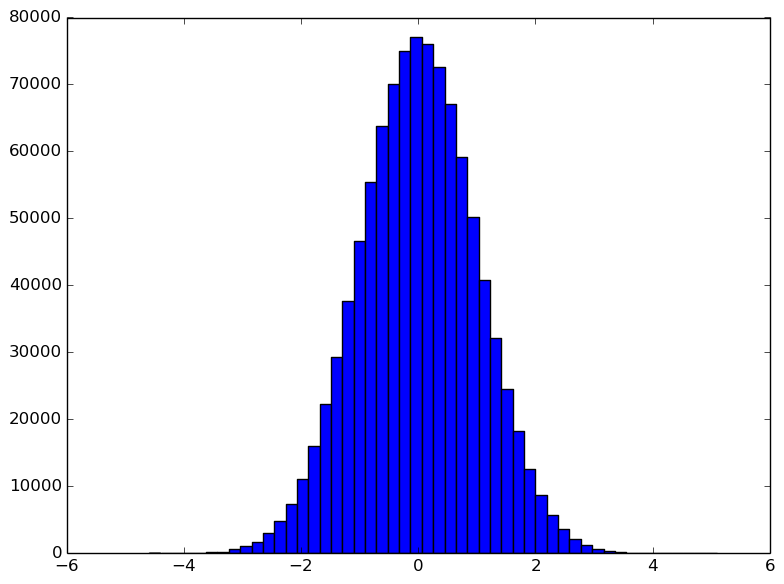

In [48]:
# Draw a histogram

y = randn(10^6)
plt[:hist](y, 50);     # We use plt.hist, because it conflicts with the built-in hist

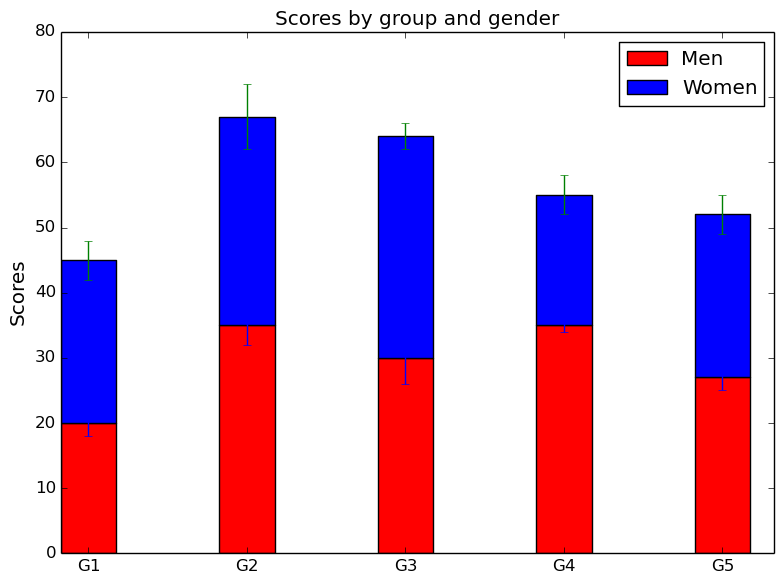

┌ Warning: `a::AbstractArray + b::Number` is deprecated, use `a .+ b` instead.
│   caller = top-level scope at none:0
└ @ Core none:0


PyObject <matplotlib.legend.Legend object at 0x7f0d4791fd10>

In [61]:
# Draw a stacked bar chart

N = 5
menMeans   = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd     = (2, 3, 4, 1, 2)
womenStd   = (3, 5, 2, 3, 3)
ind = 1:N    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = PyPlot.bar(ind, menMeans, width, color="r", yerr=menStd)
p2 = PyPlot.bar(ind, womenMeans, width, bottom=menMeans, color="b", yerr=womenStd)

ylabel("Scores")
title("Scores by group and gender")
xticks(ind+width/2., ("G1", "G2", "G3", "G4", "G5") )
legend( (p1[1], p2[1]), ("Men", "Women") )


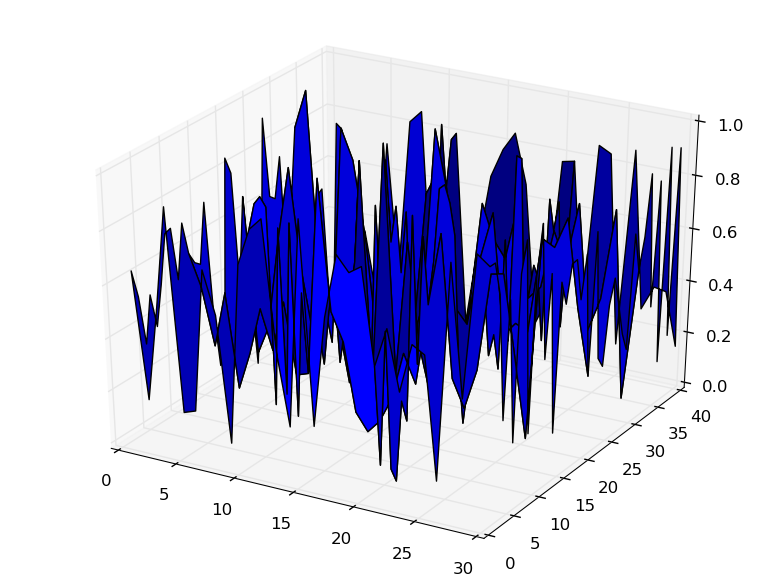

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7f0d47c3c050>

In [50]:
# Plot a random surface

surf(rand(30,40))